## Machine Learning Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
hr = pd.read_csv("HR Analytics.csv")
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Attrition Column is what we need to predict

In [3]:
hr["Attrition"].unique()

array([1, 0], dtype=int64)

In [4]:
 hr["Attrition"].value_counts()/hr.shape[0] * 100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

### converting categorical columns to numerical columns

In [5]:
hr['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [6]:
pd.get_dummies(hr['MaritalStatus']).head()

,Divorced,Married,Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [7]:
hr_dummies= pd.get_dummies(hr)

In [8]:
hr_dummies.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


## Gini Impurity

- formula =1 - probability(0)^2 - probability(1)^2
- if you have more classes in target variable, include probablity of all the classes

In [9]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(hr_dummies,test_size=0.3,random_state=100)

In [10]:
n_s=train.shape[0]

p_0=train[train['Attrition']==0].shape[0]/n_s
p_1=train[train['Attrition']==1].shape[0]/n_s

gi_train = 1 - np.square(p_0) -np.square(p_1)
gi_train

0.27190862461880494

## Gini Impurity on binary categorical columns

In [11]:
samples_left= train[train['Gender_Female']==0]
#print(samples_left.shape)

samples_right= train[train['Gender_Female']==1]
#print(samples_right.shape)

print("---------male-----------")
print(samples_left[samples_left['Attrition'] == 0].shape)
print(samples_left[samples_left['Attrition'] == 1].shape)
print("---------female-----------")
print(samples_right[samples_right['Attrition'] == 0].shape)
print(samples_right[samples_right['Attrition'] == 1].shape)

---------male-----------
(505, 56)
(105, 56)
---------female-----------
(357, 56)
(62, 56)


In [12]:
n_s=samples_left.shape[0]

left_0=samples_left[samples_left['Attrition']==0].shape[0]/n_s
left_1=samples_left[samples_left['Attrition']==1].shape[0]/n_s

gi_left = 1 - np.square(left_0) -np.square(left_1)
gi_left

0.2850040311744155

In [13]:
n_s=samples_right.shape[0]

right_0=samples_right[samples_right['Attrition']==0].shape[0]/n_s
right_1=samples_right[samples_right['Attrition']==1].shape[0]/n_s

gi_right = 1 - np.square(right_0) -np.square(right_1)
gi_right

0.2521516737772056

In [14]:
gi_overall = (samples_left.shape[0]/train.shape[0]*gi_left) + \
             (samples_right.shape[0]/train.shape[0]*gi_right)
gi_overall

0.27162683219537664

## Overtime Gini Impurity Calculation Categorical

In [15]:
samples_left= train[train['OverTime_No']==0]
#print(samples_left.shape)

samples_right= train[train['OverTime_No']==1]
#print(samples_right.shape)

print("---------male-----------")
print(samples_left[samples_left['Attrition'] == 0].shape)
print(samples_left[samples_left['Attrition'] == 1].shape)
print("---------female-----------")
print(samples_right[samples_right['Attrition'] == 0].shape)
print(samples_right[samples_right['Attrition'] == 1].shape)

---------male-----------
(197, 56)
(92, 56)
---------female-----------
(665, 56)
(75, 56)


In [16]:
n_s=samples_left.shape[0]

left_0=samples_left[samples_left['Attrition']==0].shape[0]/n_s
left_1=samples_left[samples_left['Attrition']==1].shape[0]/n_s

gi_left = 1 - np.square(left_0) - np.square(left_1)
gi_left

0.4339986350738138

In [17]:
n_s=samples_right.shape[0]

right_0=samples_right[samples_right['Attrition']==0].shape[0]/n_s
right_1=samples_right[samples_right['Attrition']==1].shape[0]/n_s

gi_right = 1 - np.square(right_0) -np.square(right_1)
gi_right

0.18215850986121246

In [18]:
gi_overall = (samples_left.shape[0]/train.shape[0]*gi_left) + \
             (samples_right.shape[0]/train.shape[0]*gi_right)
gi_overall

0.2528891184000286

## Gini Impurity Numerical Column

In [19]:
print(train['MonthlyIncome'].min())
print(train['MonthlyIncome'].max())

1009
19973


In [20]:
np.sort(train['MonthlyIncome'].unique())

array([ 1009,  1051,  1081,  1091,  1102,  1118,  1129,  1274,  1359,
        1393,  1420,  1483,  1514,  1555,  1563,  1569,  1601,  1675,
        1706,  1790,  1859,  1878,  1904,  2001,  2007,  2014,  2018,
        2024,  2028,  2029,  2033,  2042,  2044,  2045,  2058,  2061,
        2062,  2064,  2070,  2073,  2074,  2075,  2080,  2083,  2086,
        2088,  2089,  2090,  2093,  2096,  2097,  2099,  2105,  2107,
        2109,  2127,  2132,  2133,  2143,  2148,  2154,  2157,  2168,
        2174,  2176,  2177,  2180,  2187,  2194,  2201,  2206,  2207,
        2210,  2216,  2218,  2220,  2226,  2231,  2232,  2235,  2238,
        2244,  2258,  2259,  2269,  2272,  2274,  2275,  2277,  2285,
        2288,  2289,  2290,  2293,  2302,  2307,  2308,  2311,  2313,
        2319,  2322,  2323,  2325,  2326,  2328,  2335,  2339,  2340,
        2342,  2345,  2348,  2351,  2362,  2367,  2368,  2370,  2372,
        2376,  2377,  2379,  2380,  2387,  2389,  2394,  2400,  2404,
        2406,  2408,

In [21]:
np.sort(train['MonthlyIncome'].unique()).shape[0]

968

In [22]:
unique_mi= np.unique(train['MonthlyIncome'])

sort_mi = pd.Series(np.sort(unique_mi))

midpoints_mi =sort_mi.rolling(2).mean().dropna()

cuts=midpoints_mi

In [23]:
df_gi_cuts =pd.DataFrame(columns=['cut','gi'])
for cut in cuts:
    #cut =1030
    col='MonthlyIncome'
    Ns=train.shape[0]

    s_left= train[train[col]<cut]
    s_right= train[train[col]>cut]

    left_0=s_left[s_left['Attrition']==0].shape[0]/s_left.shape[0]
    left_1=s_left[s_left['Attrition']==1].shape[0]/s_left.shape[0]

    gi_left = 1 - np.square(left_0) - np.square(left_1)
    gi_left

    right_0=s_right[s_right['Attrition']==0].shape[0]/s_right.shape[0]
    right_1=s_right[s_right['Attrition']==1].shape[0]/s_right.shape[0]

    gi_right = 1 - np.square(right_0) -np.square(right_1)
    gi_right
    
    gi_cut = (s_left.shape[0]/Ns*gi_left) + \
            (s_right.shape[0]/Ns*gi_right)
    gi_cut
    
    df_gi_cuts = df_gi_cuts.append({'cut':cut,'gi':gi_cut},ignore_index=True)
    
df_gi_cuts.sort_values(by='gi',ascending=True).head(5)

,cut,gi
202,2779.5,0.254494
203,2781.5,0.254687
185,2693.5,0.254709
143,2489.5,0.254749
199,2766.0,0.254780


In [24]:
from sklearn.tree  import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=100,max_depth=2)
model.fit(train[['MonthlyIncome']],train['Attrition'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [25]:
def draw_tree(model,columns):
    import os
    from sklearn import tree
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image

    graphviz_path ='C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ['PATH'] += os.pathsep + graphviz_path


    dot_data = StringIO()
    tree.export_graphviz(model,out_file=dot_data,feature_names=columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [26]:
!pip install pydotplus

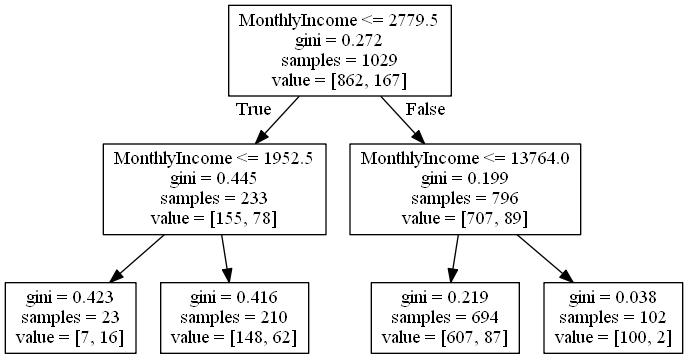

In [27]:
draw_tree(model,['MonthlyIncome'])

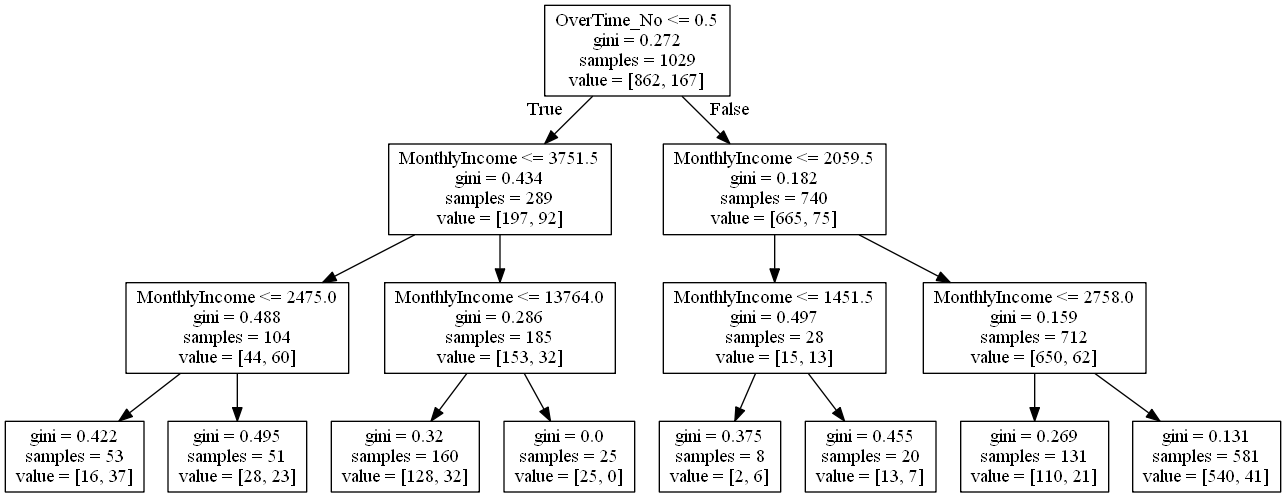

In [28]:
from sklearn.tree import DecisionTreeClassifier

model =DecisionTreeClassifier(random_state=100,max_depth=3)
input_columns= ['MonthlyIncome','OverTime_No','Gender_Female']
model.fit(train[input_columns],train['Attrition'])
draw_tree(model,input_columns)

In [29]:
pred = model.predict(test[input_columns])
pred_prob = pd.DataFrame(model.predict_proba(test[input_columns]),columns=['Prob_0','Prob_1'])
pred_prob

,Prob_0,Prob_1
0,0.839695,0.160305
1,0.301887,0.698113
2,0.929432,0.070568
3,0.800000,0.200000
4,1.000000,0.000000
5,0.800000,0.200000
6,0.800000,0.200000
7,0.929432,0.070568
8,0.549020,0.450980
9,0.929432,0.070568


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(test['Attrition'],pred)

0.8480725623582767